# Palm veins person identification

In [49]:
# Global variables
image_directory = "/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/"

# Showcase variables
selected_person = "002"
selected_hand = "l"
selected_scan = "01"


## Dataset

Used dataset is from TODO


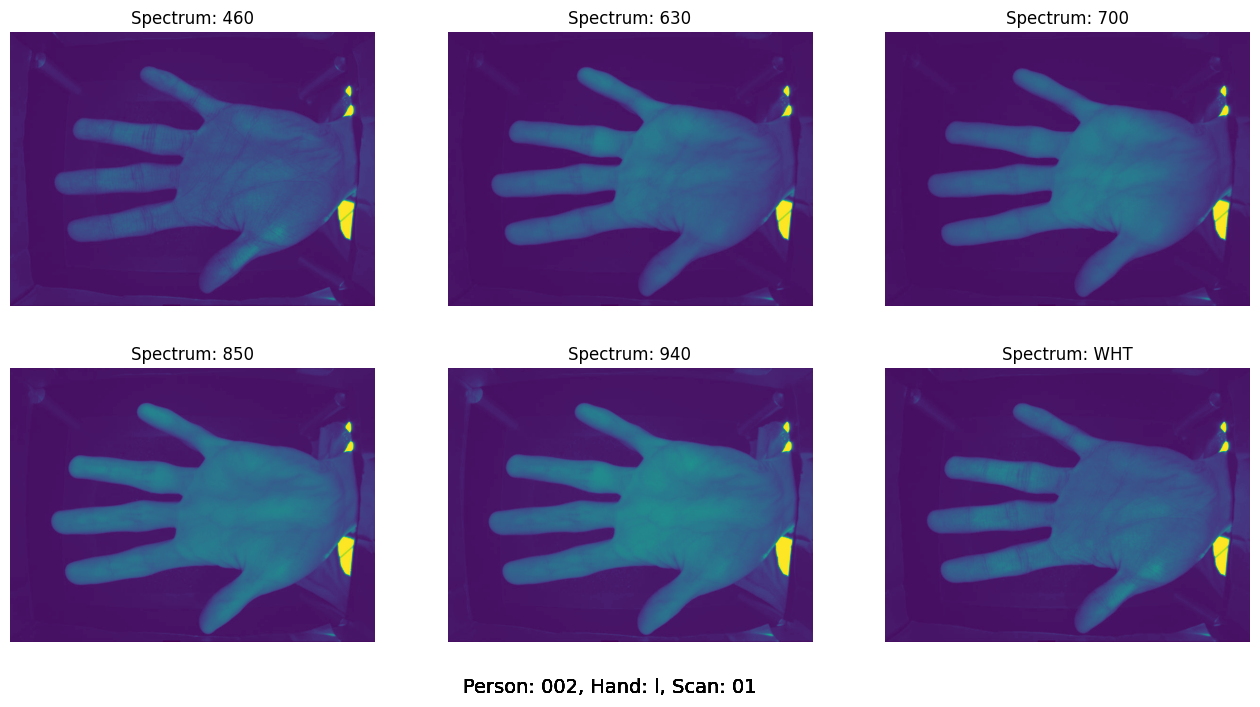

In [50]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Define the pattern and list file paths that match the pattern
pattern = f"{selected_person}_{selected_hand}_*_{selected_scan}.jpg"
matching_files = glob.glob(image_directory + pattern)

# Plot setup
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for idx, file_path in enumerate(matching_files):
    # Extract the spectrum information from the file name
    person_id, hand, spectrum, _ = (file_path.split("/")[-1]).split("_")

    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(Image.open(file_path))
    axes[row, col].set_title(f"Spectrum: {spectrum}")
    axes[row, col].axis('off')  # Turn off axis labels for cleaner display
    fig.text(0.5, 0.05, f"Person: {selected_person}, Hand: {selected_hand}, Scan: {selected_scan}", ha='center', fontsize=14)
    



['/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_01.jpg', '/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_02.jpg', '/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_03.jpg']


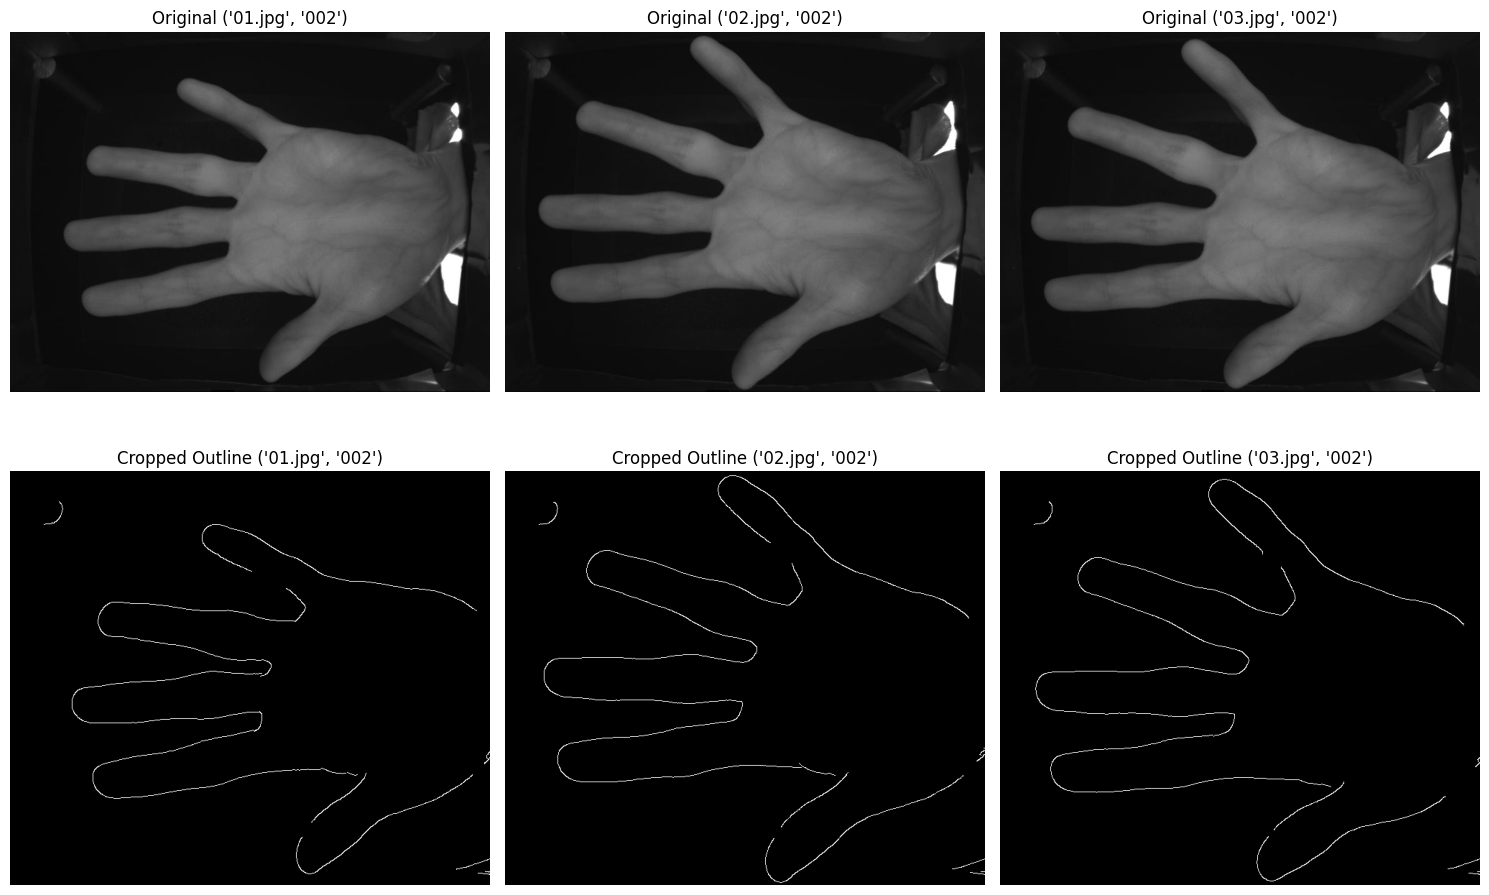

In [103]:
import glob
import cv2
import matplotlib.pyplot as plt

# Set the directory where your images are stored
image_directory = "/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/"

# Replace 'selected_person' and 'selected_hand' with your chosen person and hand
selected_person = "002"
selected_hand = "l"

# Define the spectrum to focus on
selected_spectrum = "940"

# Define the pattern to match the file names
pattern = f"{selected_person}_{selected_hand}_{selected_spectrum}_*.jpg"

# Use glob to get a list of file paths that match the pattern
matching_files = glob.glob(image_directory + pattern)

# Select the first three scans
selected_files = matching_files[:3]
print(selected_files)

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through the selected files and create an outline
for idx, file_path in enumerate(selected_files):
    # Extract the spectrum information from the file name
    person_id, hand, spectrum, number = (file_path.split("/")[-1]).split("_")

    # Open the image using OpenCV for edge detection
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Use Canny edge detection
    edges = cv2.Canny(blurred, 50, 10)

    # Crop the right side of the image
    cropped_edges = edges[:, :edges.shape[1] - 100]

    # Display the original image
    axes[0, idx].imshow(image, cmap='gray')
    axes[0, idx].set_title(f"Original {number, person_id}")
    axes[0, idx].axis('off')

    # Create a subplot for the outlined image
    axes[1, idx].imshow(cropped_edges, cmap='gray')
    axes[1, idx].set_title(f"Cropped Outline {number, person_id}")
    axes[1, idx].axis('off')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()

['/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_01.jpg', '/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_02.jpg', '/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/002_l_940_03.jpg']


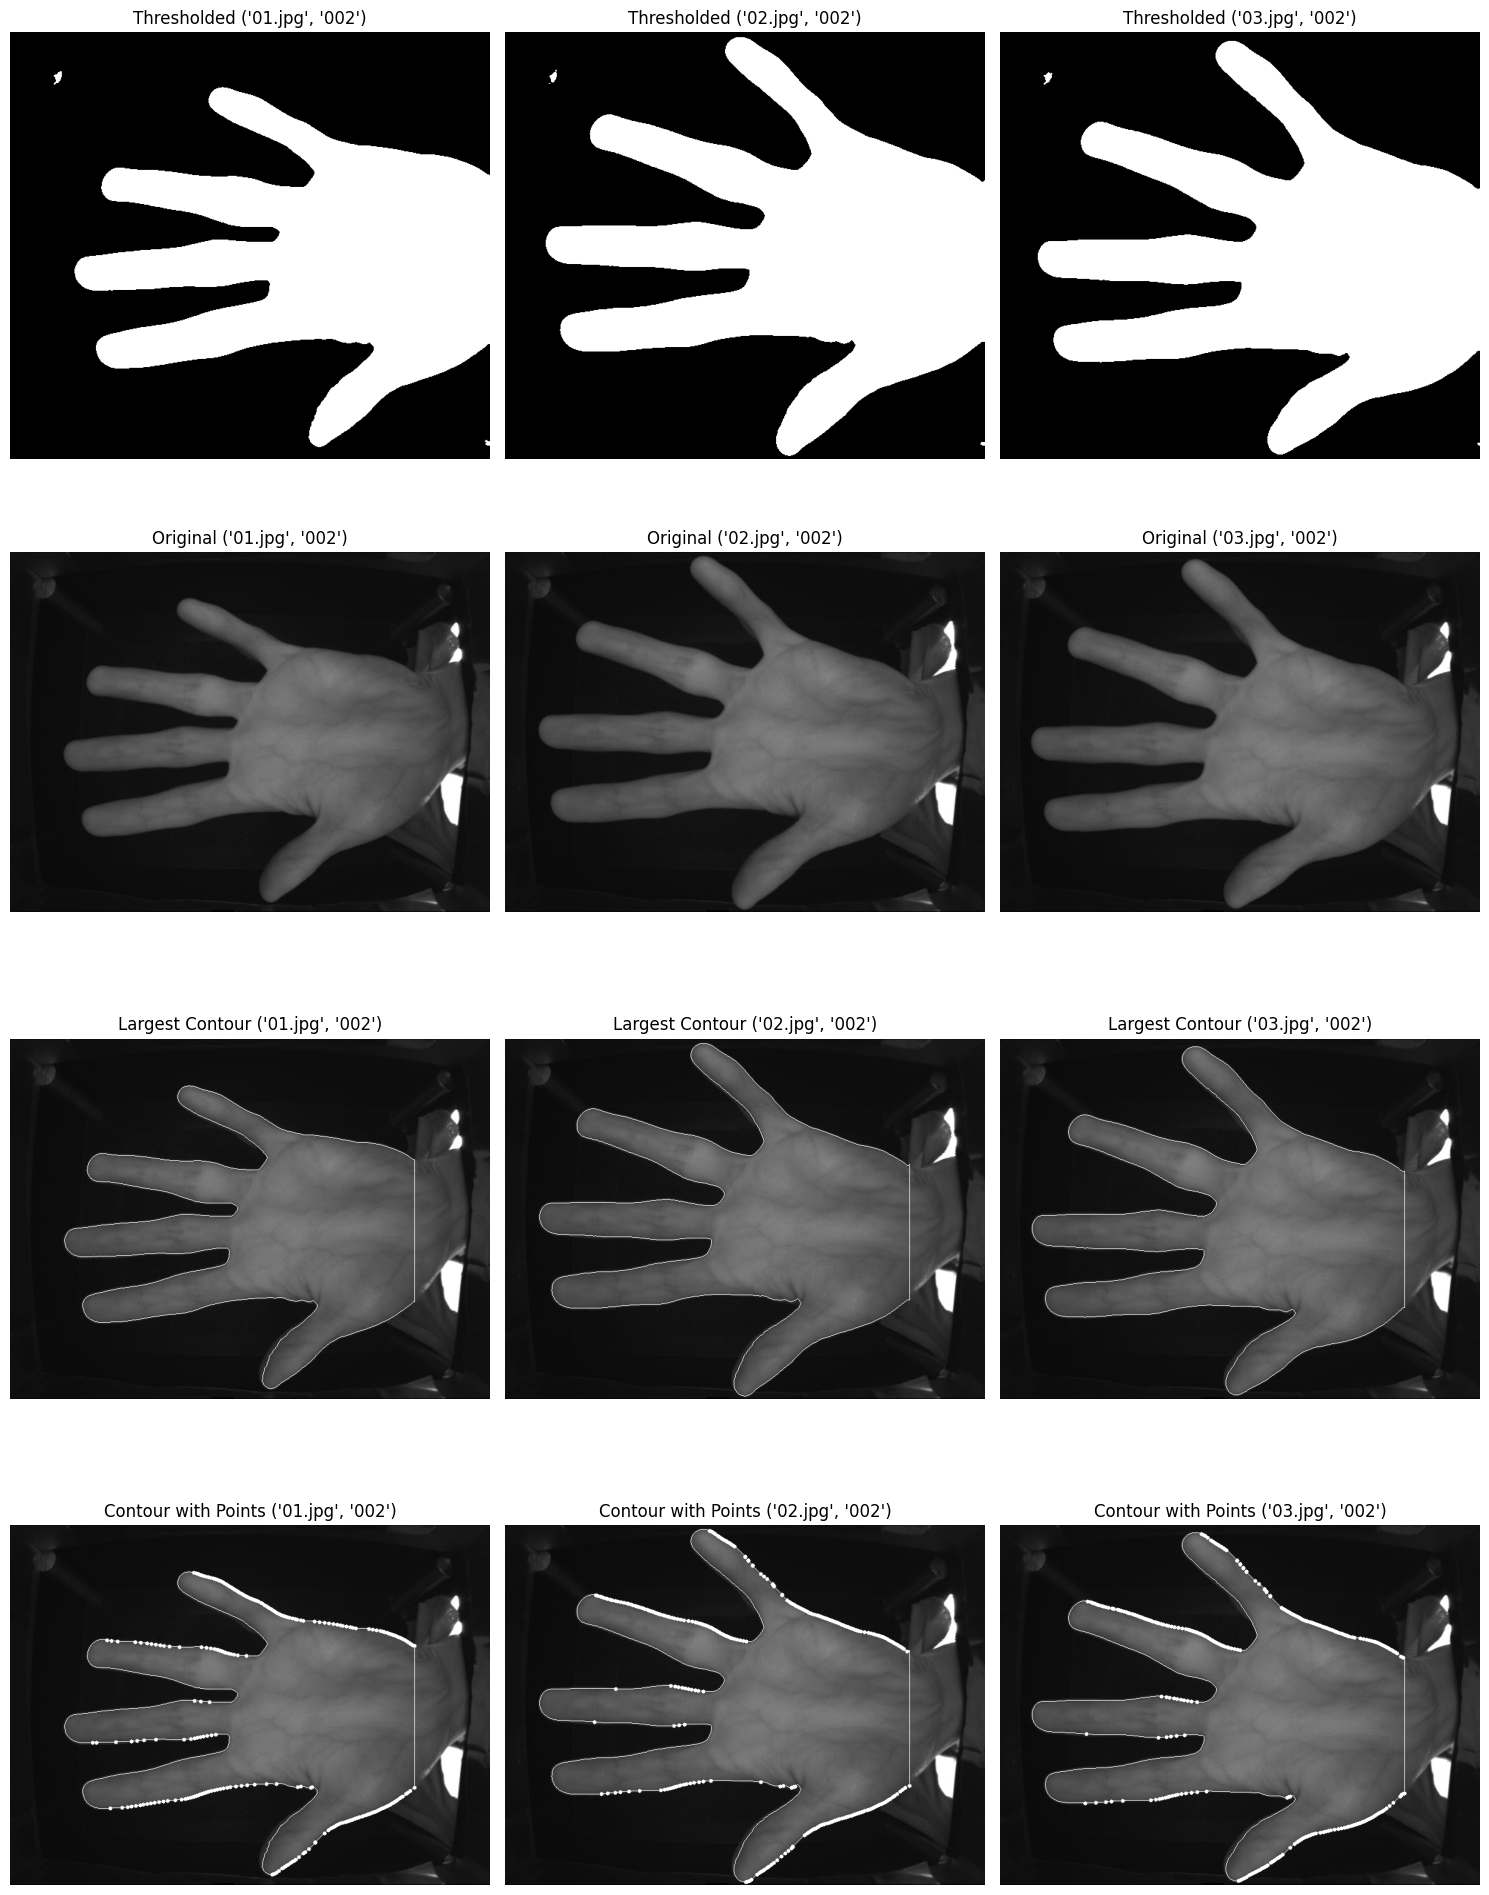

In [169]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Set the directory where your images are stored
image_directory = "/mnt/c/Users/misko/Documents/my_docs/Skola/VS/MIT2/BIO/project/dataset/images/"

# Replace 'selected_person' and 'selected_hand' with your chosen person and hand
selected_person = "002"
selected_hand = "l"

# Define the spectrum to focus on
selected_spectrum = "940"

# Define the pattern to match the file names
pattern = f"{selected_person}_{selected_hand}_{selected_spectrum}_*.jpg"

# Use glob to get a list of file paths that match the pattern
matching_files = glob.glob(image_directory + pattern)

# Select the first three scans
selected_files = matching_files[:3]
print(selected_files)

# Manually defined threshold (adjust this value according to your needs)
manual_threshold = 50

# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Loop through the selected files and create an outline
for idx, file_path in enumerate(selected_files):
    # Extract the spectrum information from the file name
    person_id, hand, spectrum, number = (file_path.split("/")[-1]).split("_")

    # Open the image using OpenCV
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Crop the right side of the image
    cropped_image = image[:, :image.shape[1] - 120]

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(cropped_image, (5, 5), 0)

    # Manually defined thresholding
    _, thresholded = cv2.threshold(blurred, manual_threshold, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the thresholded image
    axes[0, idx].imshow(thresholded, cmap='gray')
    axes[0, idx].set_title(f"Thresholded {number, person_id}")
    axes[0, idx].axis('off')

    # Draw the original image
    axes[1, idx].imshow(image, cmap='gray')
    axes[1, idx].set_title(f"Original {number, person_id}")
    axes[1, idx].axis('off')

    # Create an image for drawing contours
    image_with_contours = np.copy(image)

    # Draw the largest contour on the image_with_contours
    cv2.drawContours(image_with_contours, [largest_contour], -1, (255, 255, 255), 1)

    # Display the image with contours
    axes[2, idx].imshow(image_with_contours, cmap='gray')
    axes[2, idx].set_title(f"Largest Contour {number, person_id}")
    axes[2, idx].axis('off')

    # Find valleys between fingers based on slope changes
    slopes = np.diff(largest_contour[:, 0, 1])
    valley_indices = np.where(slopes[:-1] < 0)[0]

    # Draw significant points on the image with contours
    for point_idx in valley_indices:
        cv2.circle(image_with_contours, tuple(largest_contour[point_idx][0]), 3, (255, 255, 255), -1)

    # Display the image with contours and significant points
    axes[3, idx].imshow(image_with_contours, cmap='gray')
    axes[3, idx].set_title(f"Contour with Points {number, person_id}")
    axes[3, idx].axis('off')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()








